# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1519322314000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":315},"features":[{"type":"Feature","properties":{"mag":4.2,"place":"115km S of San Pedro de Atacama, Chile","time":1519307135460,"updated":1519319434040,"tz":-240,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us2000d6d1","detail":"https://earthquake.us


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 4.2, 'place': '115km S of San Pedro de Atacama, Chile', 'time': 1519307135460, 'updated': 1519319434040, 'tz': -240, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000d6d1', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us2000d6d1.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 271, 'net': 'us', 'code': '2000d6d1', 'ids': ',us2000d6d1,', 'sources': ',us,', 'types': ',geoserve,origin,phase-data,', 'nst': None, 'dmin': 0.998, 'rms': 0.9, 'gap': 126, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.2 - 115km S of San Pedro de Atacama, Chile'}, 'geometry': {'type': 'Point', 'coordinates': [-68.1037, -23.953, 178.02]}, 'id': 'us2000d6d1'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties']) #{}denotes dict and []denotes list

{'coordinates': [-68.1037, -23.953, 178.02], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '2000d6d1',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us2000d6d1.geojson',
 'dmin': 0.998,
 'felt': None,
 'gap': 126,
 'ids': ',us2000d6d1,',
 'mag': 4.2,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '115km S of San Pedro de Atacama, Chile',
 'rms': 0.9,
 'sig': 271,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1519307135460,
 'title': 'M 4.2 - 115km S of San Pedro de Atacama, Chile',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': -240,
 'updated': 1519319434040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000d6d1'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.2 - 115km S of San Pedro de Atacama, Chile
M 4.4 - 276km ESE of Kodiak, Alaska
M 4.7 - 106km SW of Jiquilillo, Nicaragua
M 3.2 - 12km ESE of Lincoln, Montana
M 2.9 - 22km NNE of Snyder, Texas
M 2.8 - 11km SW of Perry, Oklahoma
M 3.0 - 13km ESE of Soda Springs, Idaho
M 2.6 - 12km NE of West Yellowstone, Montana
M 4.4 - 262km ESE of Kodiak, Alaska
M 2.9 - 10km WNW of Cobb, CA
M 3.2 - 46km N of Charlotte Amalie, U.S. Virgin Islands
M 5.3 - 214km E of Amahai, Indonesia
M 2.7 - 51km SW of Cantwell, Alaska
M 5.4 - 205km E of Amahai, Indonesia
M 4.1 - 9km NW of Paralia, Greece
M 5.0 - Northern Mid-Atlantic Ridge
M 3.4 - 112km SSE of Homer, Alaska
M 4.2 - 74km S of Pirgos, Greece
M 3.2 - 18km N of Christiansted, U.S. Virgin Islands
M 2.8 - 60km ENE of Cantwell, Alaska
M 5.0 - 35km W of Katastarion, Greece
M 4.3 - 4km ENE of Asenovgrad, Bulgaria
M 3.3 - 86km SSW of Shishmaref, Alaska
M 5.0 - 64km S of Hualian, Taiwan
M 2.7 - 20km W of Perry, Oklahoma
M 4.8 - 164km ESE of JP Tinian Town pre-

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

315


In [10]:
# print the first few lines of data

print(df.head())

    depth  magnitude
0  178.02       4.20
1   16.93       4.40
2   10.00       4.70
3   10.37       3.16
4    3.65       2.90


In [11]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  315.000000  315.000000
mean    37.505683    3.723397
std     49.713763    0.910657
min     -2.100000    2.470000
25%      9.650000    2.835000
50%     12.430000    3.600000
75%     51.465000    4.500000
max    351.320000    7.200000


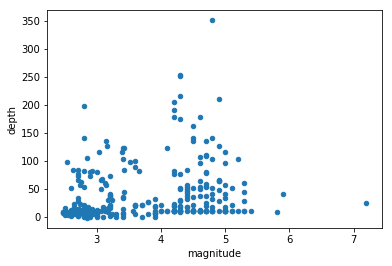

In [12]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [13]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [14]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

    depth  magnitude
0  178.02       4.20
1   16.93       4.40
2   10.00       4.70
3   10.37       3.16
4    3.65       2.90


C:\Users\Shraddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [15]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [22]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url #prepare that request of end point and print the url of young lib
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [26]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': '401', 'short_name': '401', 'types': ['street_number']}, {'long_name': 'Hilltop Avenue', 'short_name': 'Hilltop Ave', 'types': ['route']}, {'long_name': 'Lexington', 'short_name': 'Lexington', 'types': ['locality', 'political']}, {'long_name': 'Fayette County', 'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Kentucky', 'short_name': 'KY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '40506', 'short_name': '40506', 'types': ['postal_code']}, {'long_name': '0001', 'short_name': '0001', 'types': ['postal_code_suffix']}], 'formatted_address': '401 Hilltop Ave, Lexington, KY 40506, USA', 'geometry': {'location': {'lat': 38.0328721, 'lng': -84.5017179}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 38.0342210802915, 'lng': -84.50036891970849}, 'southwest': {'lat

In [27]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': '401',
                                      'short_name': '401',
                                      'types': ['street_number']},
                                     {'long_name': 'Hilltop Avenue',
                                      'short_name': 'Hilltop Ave',
                                      'types': ['route']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
               

In [28]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.0328721 -84.5017179


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [29]:
#Exercise #1 - Locate OHR building
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'OHR Building uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url #prepare that request of end point and print the url of young lib
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=OHR+Building+uky


In [30]:
response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': 'Lexington', 'short_name': 'Lexington', 'types': ['locality', 'political']}, {'long_name': 'Fayette County', 'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Kentucky', 'short_name': 'KY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '40506', 'short_name': '40506', 'types': ['postal_code']}], 'formatted_address': 'Lexington, KY 40506, USA', 'geometry': {'location': {'lat': 38.0306511, 'lng': -84.5039697}, 'location_type': 'GEOMETRIC_CENTER', 'viewport': {'northeast': {'lat': 38.0320000802915, 'lng': -84.5026207197085}, 'southwest': {'lat': 38.0293021197085, 'lng': -84.50531868029151}}}, 'place_id': 'ChIJZQxUxbZEQogRZ0KY7kqd_44', 'types': ['establishment', 'point_of_interest', 'university']}], 'status': 'OK'}


In [31]:
pp.pprint(data)

{'results': [{'address_components': [{'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
                                      'types': ['administrative_area_level_1',
                                                'political']},
                                     {'long_name': 'United States',
                                      'short_name': 'US',
                                      'types': ['country', 'political']},
                                     {'long_name': '

In [32]:
for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.0306511 -84.5039697


# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [34]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [35]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *#its looking for keys in the folder

In [36]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [37]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @UKTix: Purchase or renew 2018 @UKFootball season tickets and receive great benefits and incentives! It's that easy!

BUY: https://t.co/…


In [38]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Feb 22 15:22:19 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 933121999,
                                 'id_str': '933121999',
                                 'indices': [3, 9],
                                 'name': 'UK Ticket Office',
                                 'screen_name': 'UKTix'},
                                {'id': 360022514,
                                 'id_str': '360022514',
                                 'indices': [34, 45],
                                 'name': 'Kentucky Football',
                                 'screen_name': 'UKFootball'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 966694651326615552,
 'id_str': '966694651326615552',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_rep

### Other API endpoints allow different types of searches

In [39]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Is it just me or do most SEC teams lose the game after the #Kentucky game? Damn son don’t metaphorically blow your wad #bbn

Uhm yes please. #BBN https://t.co/a9bWkVrpXU

RT @JEdwar247: 23 offers and counting. The #Kentucky Junior Day visitor list is LOADED [VIP] - https://t.co/ByYcDuZoMy #BBN

#bbnaija #DoubleWahala #bigbrothernaija2018 #bbn #BBNaija3 #bbnaija2018 #bbnaijafans #teammina #teammiracle… https://t.co/6y1h7gE5P9

RT @PrepHoops_WI: Ssshhhhhhhh...@raf_tyler #BBN https://t.co/LlODeWXwXn



In [40]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @sengarajay235: वोट के लिए खुले में नोट बांट रहे हैं कांग्रेस प्रत्याशी
मुंगावली उपचुनाव में हार के डर से हताश कांग्रेस अब मतदाताओं को…

@AdamVaaancho @HoarafushiD Mi firihen kulhi yagundaa aai vagu adhurey adhi dhinkeyo Nihaan Jalah vanna dhuvas footakah gaaiy vehje

RT @Radheshyam12pat: @ZeeMPCG Sarkar karmachariyo ka samvidha ke naam par kewal shoshan kar rahe he

RT @NaveenmishraT: वाकई में #68500_शिक्षकों की भर्ती में ये #संशोधन करती है,माननीय #योगी_सरकार तो #विजन_2019 की जिम्मेदारी #शिक्षामित्रों…

RT @SattsahebGopal: #Guru_Gyaan
शीलवंत सबसे बड़ा, सब रतनन की खान ।
तीन लोक की संपदा, रही शील में आन ।

हममें शीतलता कैसे आ सकती है? जानने…



In [41]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

There’s still time to sign up for our last event of Raise the Dough tonight at 6pm! There is a… https://t.co/8aX10jJJ33

This our world u just livin in it @ Kappa Delta - Epsilon Omega Chapter https://t.co/29f6Q3gosu

Pop-up Research Rescue @UKLittleLibrary 6:30 - 9pm  @UKLibraries https://t.co/STS1MNpqwg

It’s like Christmas Eve anticipation in the studio!!  New Reformers arriving tomorrow!! 🎉💪🏻🥂… https://t.co/w0Lz2QWBMe

Lots of bright and creative minds in the University of Kentucky College of Communication and Information! 

We had… https://t.co/zvDv8lB7Mf

fuckinrealtyrone is such a punk...that’s why I kicked him in his… https://t.co/JCAOxxSHFI

We are set up and excited to talk to eager @uk_ci students at their departments Career Fair! https://t.co/i23kbxEFxZ



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [47]:
#Exercise1
endpoint = 'search/tweets'
params = {
    'q': 'trump', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @EdKrassen: It is disgusting that President Trump is using the tragedy in Parkland to promote the sale of more guns, by suggesting that…

@kylegriffin1 Getting shot by an AR 15 is pretty hard on them too #trump

RT @maddow: https://t.co/oJ2HqXL2Q6

RT @NBCPolitics: Trump floats bonuses for teachers willing to carry guns in class https://t.co/peR0OgJ2ZI

How the N.R.A. Keeps Federal Gun Regulators in Check via @NYTimes https://t.co/wqUsiyawOd



In [48]:
#Exercise1
endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'malayalam', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

ദ്രാവിഡ സ്വത്വം ആഘോഷിക്കപ്പെടുമ്പോള്‍ അതൊരു കോറസായി ദില്ലിയിലെത്തും; കമല്‍ഹാസന്‍ https://t.co/Yz3yHkPS07… https://t.co/q2oxRqXawW

ഇമ ചിമ്മുക (WINK) എന്നാല്‍ ഗൂഗിളിന് ഒറ്റ അര്‍ത്ഥമേയുള്ളൂ അത് പ്രിയാ വാര്യരാണ്; മാണിക്യമലരായ പൂവിയെ ഏറ്റെടുത്ത് ഗൂഗി… https://t.co/fR5dqE3fC2

കഞ്ചാവ് കൃഷി ചെയ്യാനും പഠിപ്പിക്കാനും കായിക താരം https://t.co/St3Mx1uorB

അഡാര്‍ ലൗവിലെ ഗാനം പിന്‍വലിക്കില്ലെന്ന് അണിയറ പ്രവര്‍ത്തകര്‍ 
https://t.co/mEqxghm7KF
#OruAdaarLove #PriyaWarrier #ഒരുഅഡാർലവ് #പ്രിയവാര്യർ

അവസാന ആഗ്രഹം ബാക്കിയാക്കി ലാലേട്ടന്റെ ആ ആരാധിക വിടവാങ്ങി
 https://t.co/f0eTu4n1NZ
#Mohanlal #മോഹൻലാൽ



### Bonus: Streaming live tweets in real time 

In [43]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Feb 22 18:39:30 +0000 2018
Brno, Česká republika, Česká republika
Угадайте, кто сегодня играл в волейбол 2,5 часа, и теперь на седьмом небе от счастья😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱😱❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️

Thu Feb 22 18:39:30 +0000 2018
Johannesburg, South Africa, South Africa
Sophiatown 🔥🔥🔥🔥🔥 #UJAPKFYC18

Thu Feb 22 18:39:30 +0000 2018
Frostburg, MD, United States
@GavWill13 I’ll enjoy the moment!

Thu Feb 22 18:39:30 +0000 2018
Waterbeach, England, United Kingdom
@Sally_Illsley @Girlguiding Right, Our Chalet 2020 it is! Bring it on @Sally_Illsley @salter_abi #mountaintopmoment

Thu Feb 22 18:39:30 +0000 2018
Duque de Caxias, Brasil, Brasil
Essa merda de chuva atrasando tudo

Thu Feb 22 18:39:30 +0000 2018
Alingsås, Sverige, Sweden
@11Hassel @ibklidkoping @FlodaIBKPodcast haha ja jävla otur😆 men vi bjöd på ditt första så du får vara hyfsat nöjd ändå!

Thu Feb 22 18:39:30 +0000 2018
São Gonçalo, Brasil, Brasil
Ótima https://t.co/wzx2KVjOhL

Thu Feb 22 18:39:30 +0000 2018
San Antonio, TX, United Sta

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [5]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

In [14]:
data = json.loads(results)

In [15]:
quakes = data['features']

In [17]:
# pull out lat long into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'Longitude': [q['geometry']['coordinates'][0] for q in quakes],
     'Latitude': [q['geometry']['coordinates'][1] for q in quakes]}
df = pd.DataFrame.from_dict(d)

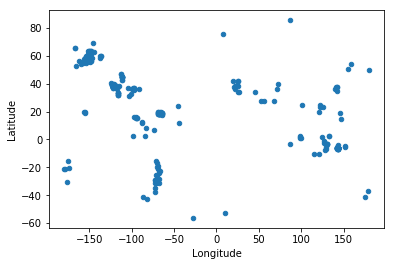

In [18]:
df.plot(x='Longitude', y='Latitude', kind='scatter')

In [24]:
endpoint = 'https://maps.googleapis.com/maps/api/directions/json'
params = {
    'origin':'Kentucky',
    'destination':'Connecticut',
    'key':''
    }
url = requests.Request('GET',endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/directions/json?origin=Kentucky&destination=Connecticut&key=


In [25]:
response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'geocoded_waypoints': [{'geocoder_status': 'OK', 'place_id': 'ChIJyVMZi0xzQogR_N_MxU5vH3c', 'types': ['administrative_area_level_1', 'political']}, {'geocoder_status': 'OK', 'place_id': 'ChIJpVER8hFT5okR5XBhBVttmq4', 'types': ['administrative_area_level_1', 'political']}], 'routes': [{'bounds': {'northeast': {'lat': 41.6074491, 'lng': -73.0574723}, 'southwest': {'lat': 37.8376601, 'lng': -84.2770898}}, 'copyrights': 'Map data ©2018 Google', 'legs': [{'distance': {'text': '798 mi', 'value': 1283878}, 'duration': {'text': '12 hours 8 mins', 'value': 43680}, 'end_address': 'Connecticut, USA', 'end_location': {'lat': 41.6030999, 'lng': -73.08767519999999}, 'start_address': 'Kentucky, USA', 'start_location': {'lat': 37.8376601, 'lng': -84.2672549}, 'steps': [{'distance': {'text': '6.2 mi', 'value': 9920}, 'duration': {'text': '9 mins', 'value': 538}, 'end_location': {'lat': 37.899982, 'lng': -84.27083209999999}, 'html_instructions': 'Head <b>northeast</b> on <b>KY-388</b> toward <b>Sam Jon